In [1]:
# Install necessary packages

!pip install ultralytics
!pip install roboflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 827.2 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [2]:
# Import the ultralytics package and run checks to verify the installation

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.1/78.2 GB disk)


In [3]:
# Import the YOLO class from the ultralytics package

from ultralytics import YOLO

In [4]:
#download the dataset in YOLOv8 format


from roboflow import Roboflow
rf = Roboflow(api_key="oe2y94ZhnDlasZz4e947")
project = rf.workspace("project208").project("hazards-kch7i")
version = project.version(5)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.79, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to hazards-5 in yolov8:: 100%|██████████| 3057/3057 [00:00<00:00, 4569.89it/s]


#Custom Training

In [6]:
!yolo task=detect mode=train model=yolov8s.pt data='/content/hazards-5/data.yaml' epochs=100 imgsz=640 batch=16


Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/hazards-5/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

#Visualization

In [8]:
## Clear the output in the IPython environment to reduce clutter

from IPython import display
display.clear_output()

In [9]:
# Import the display and Image classes from IPython.display to show images inline

from IPython.display import display, Image

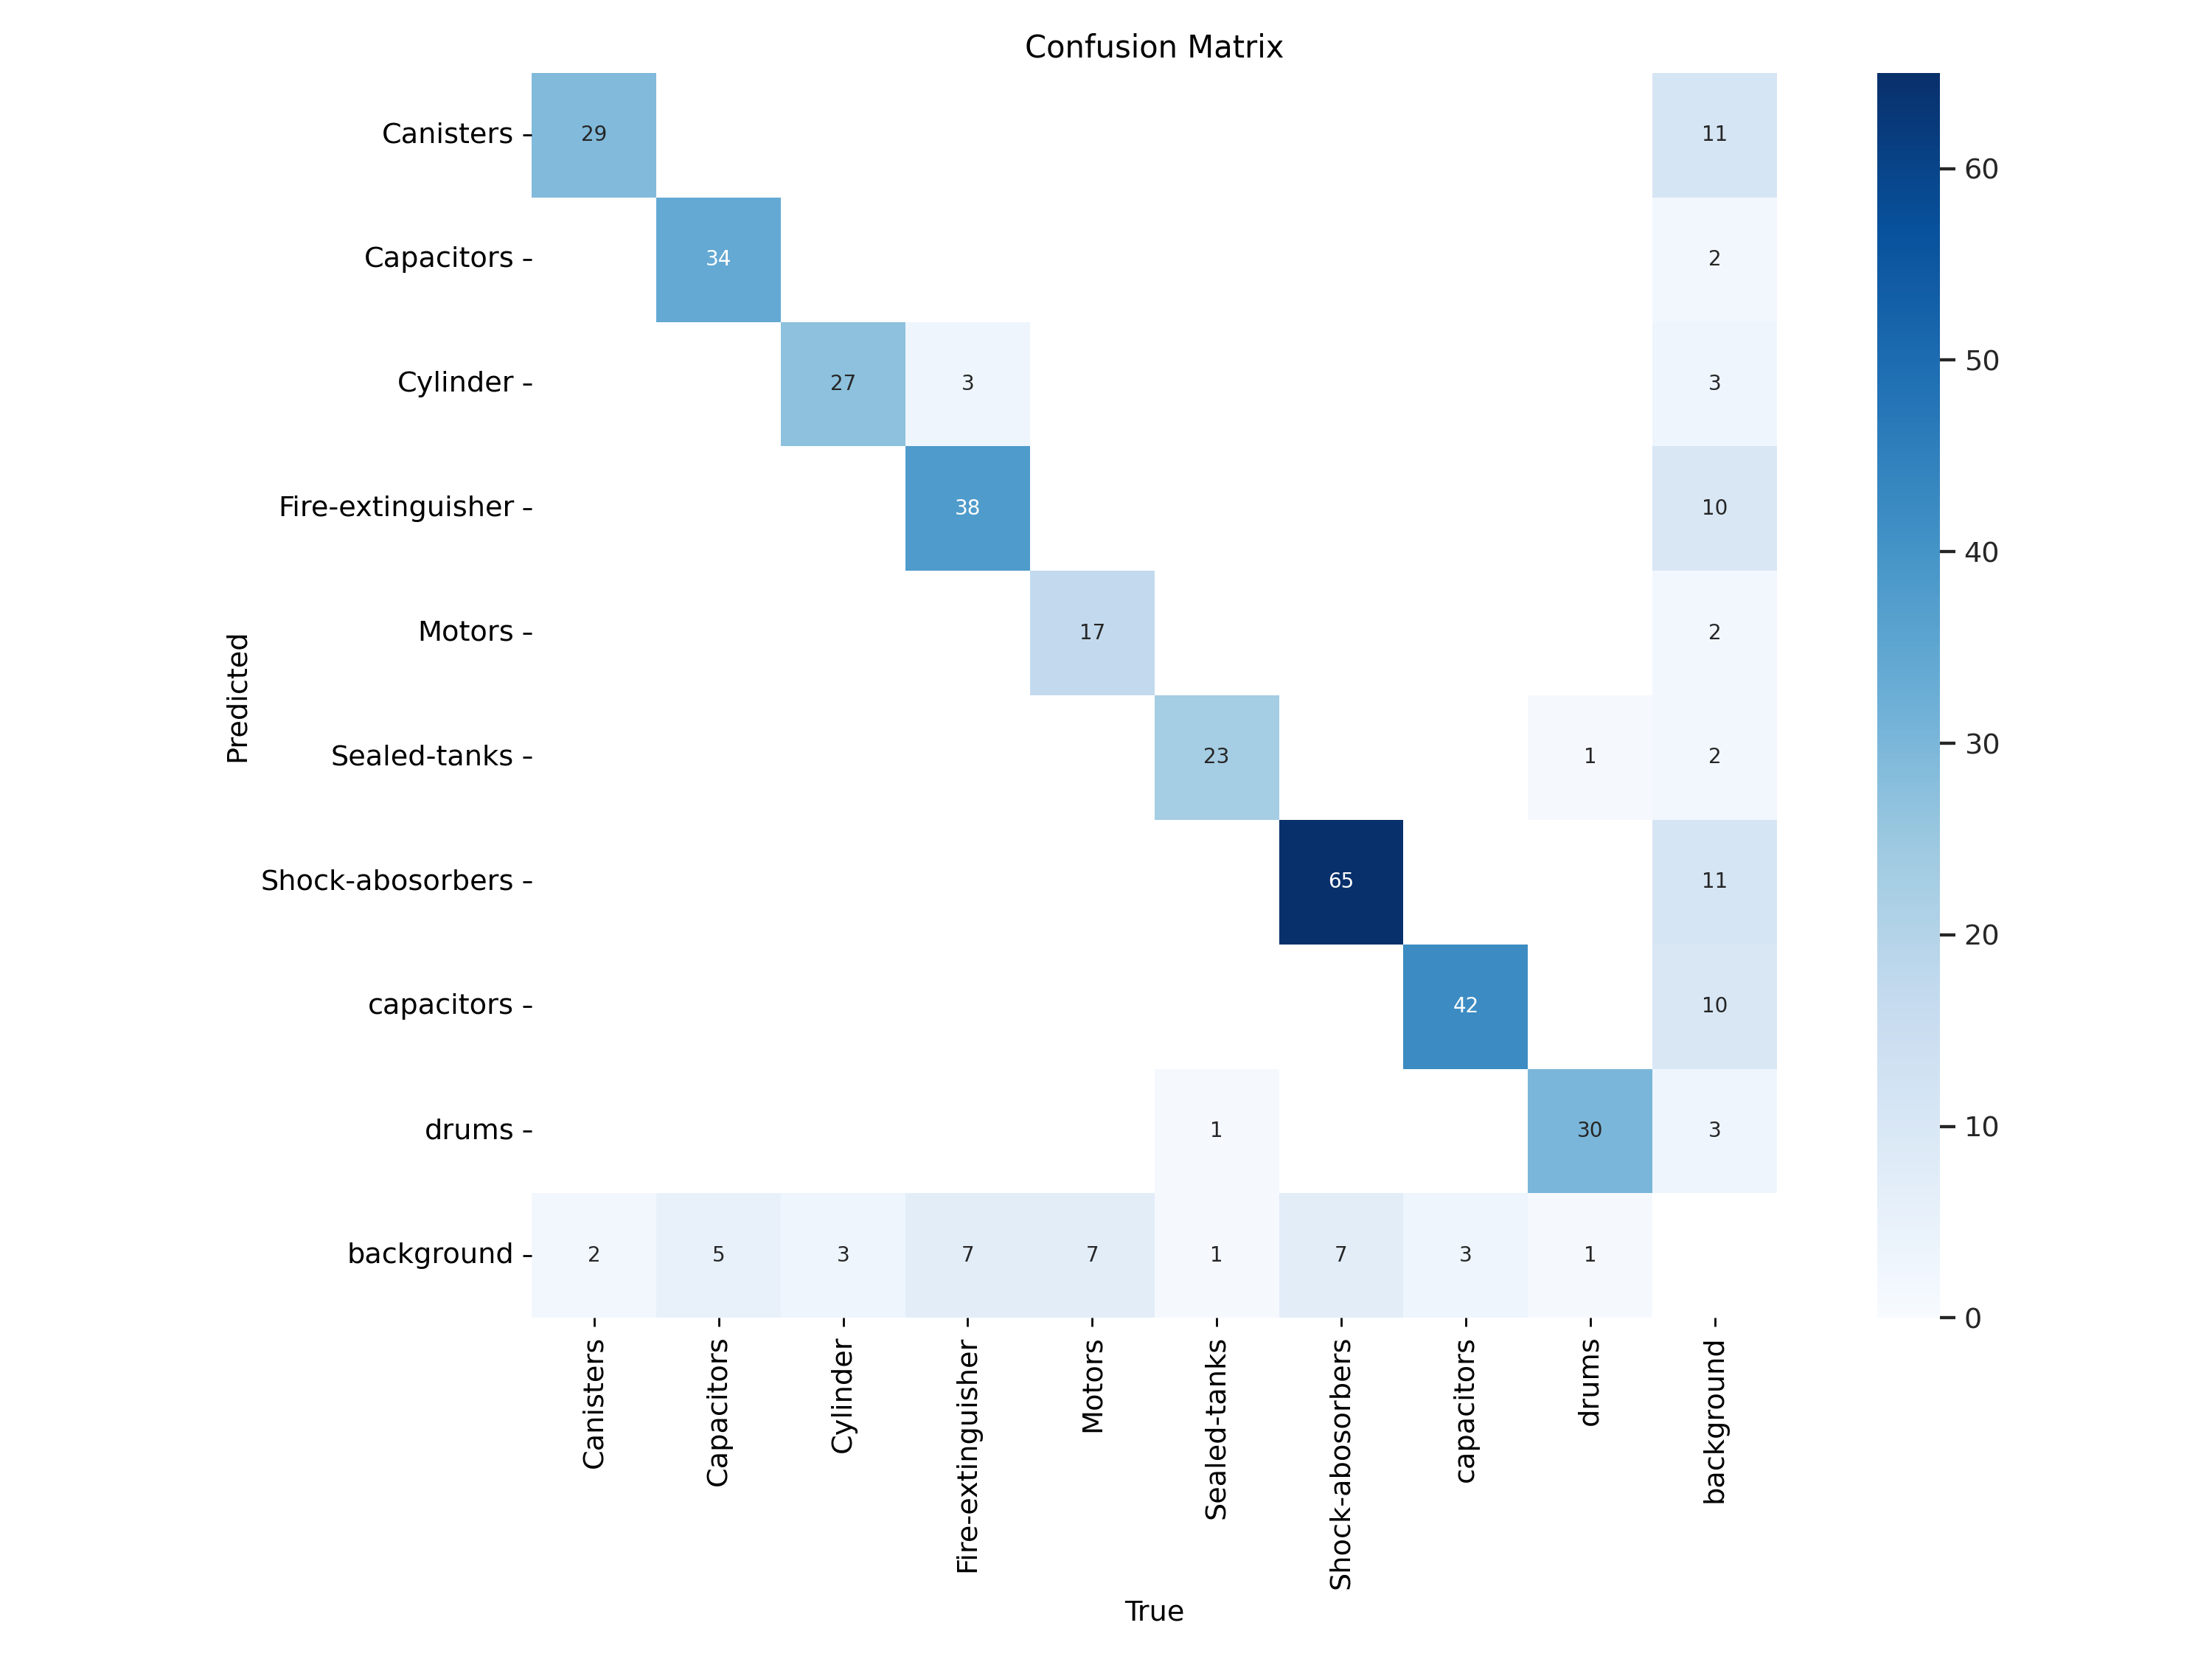

In [10]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)

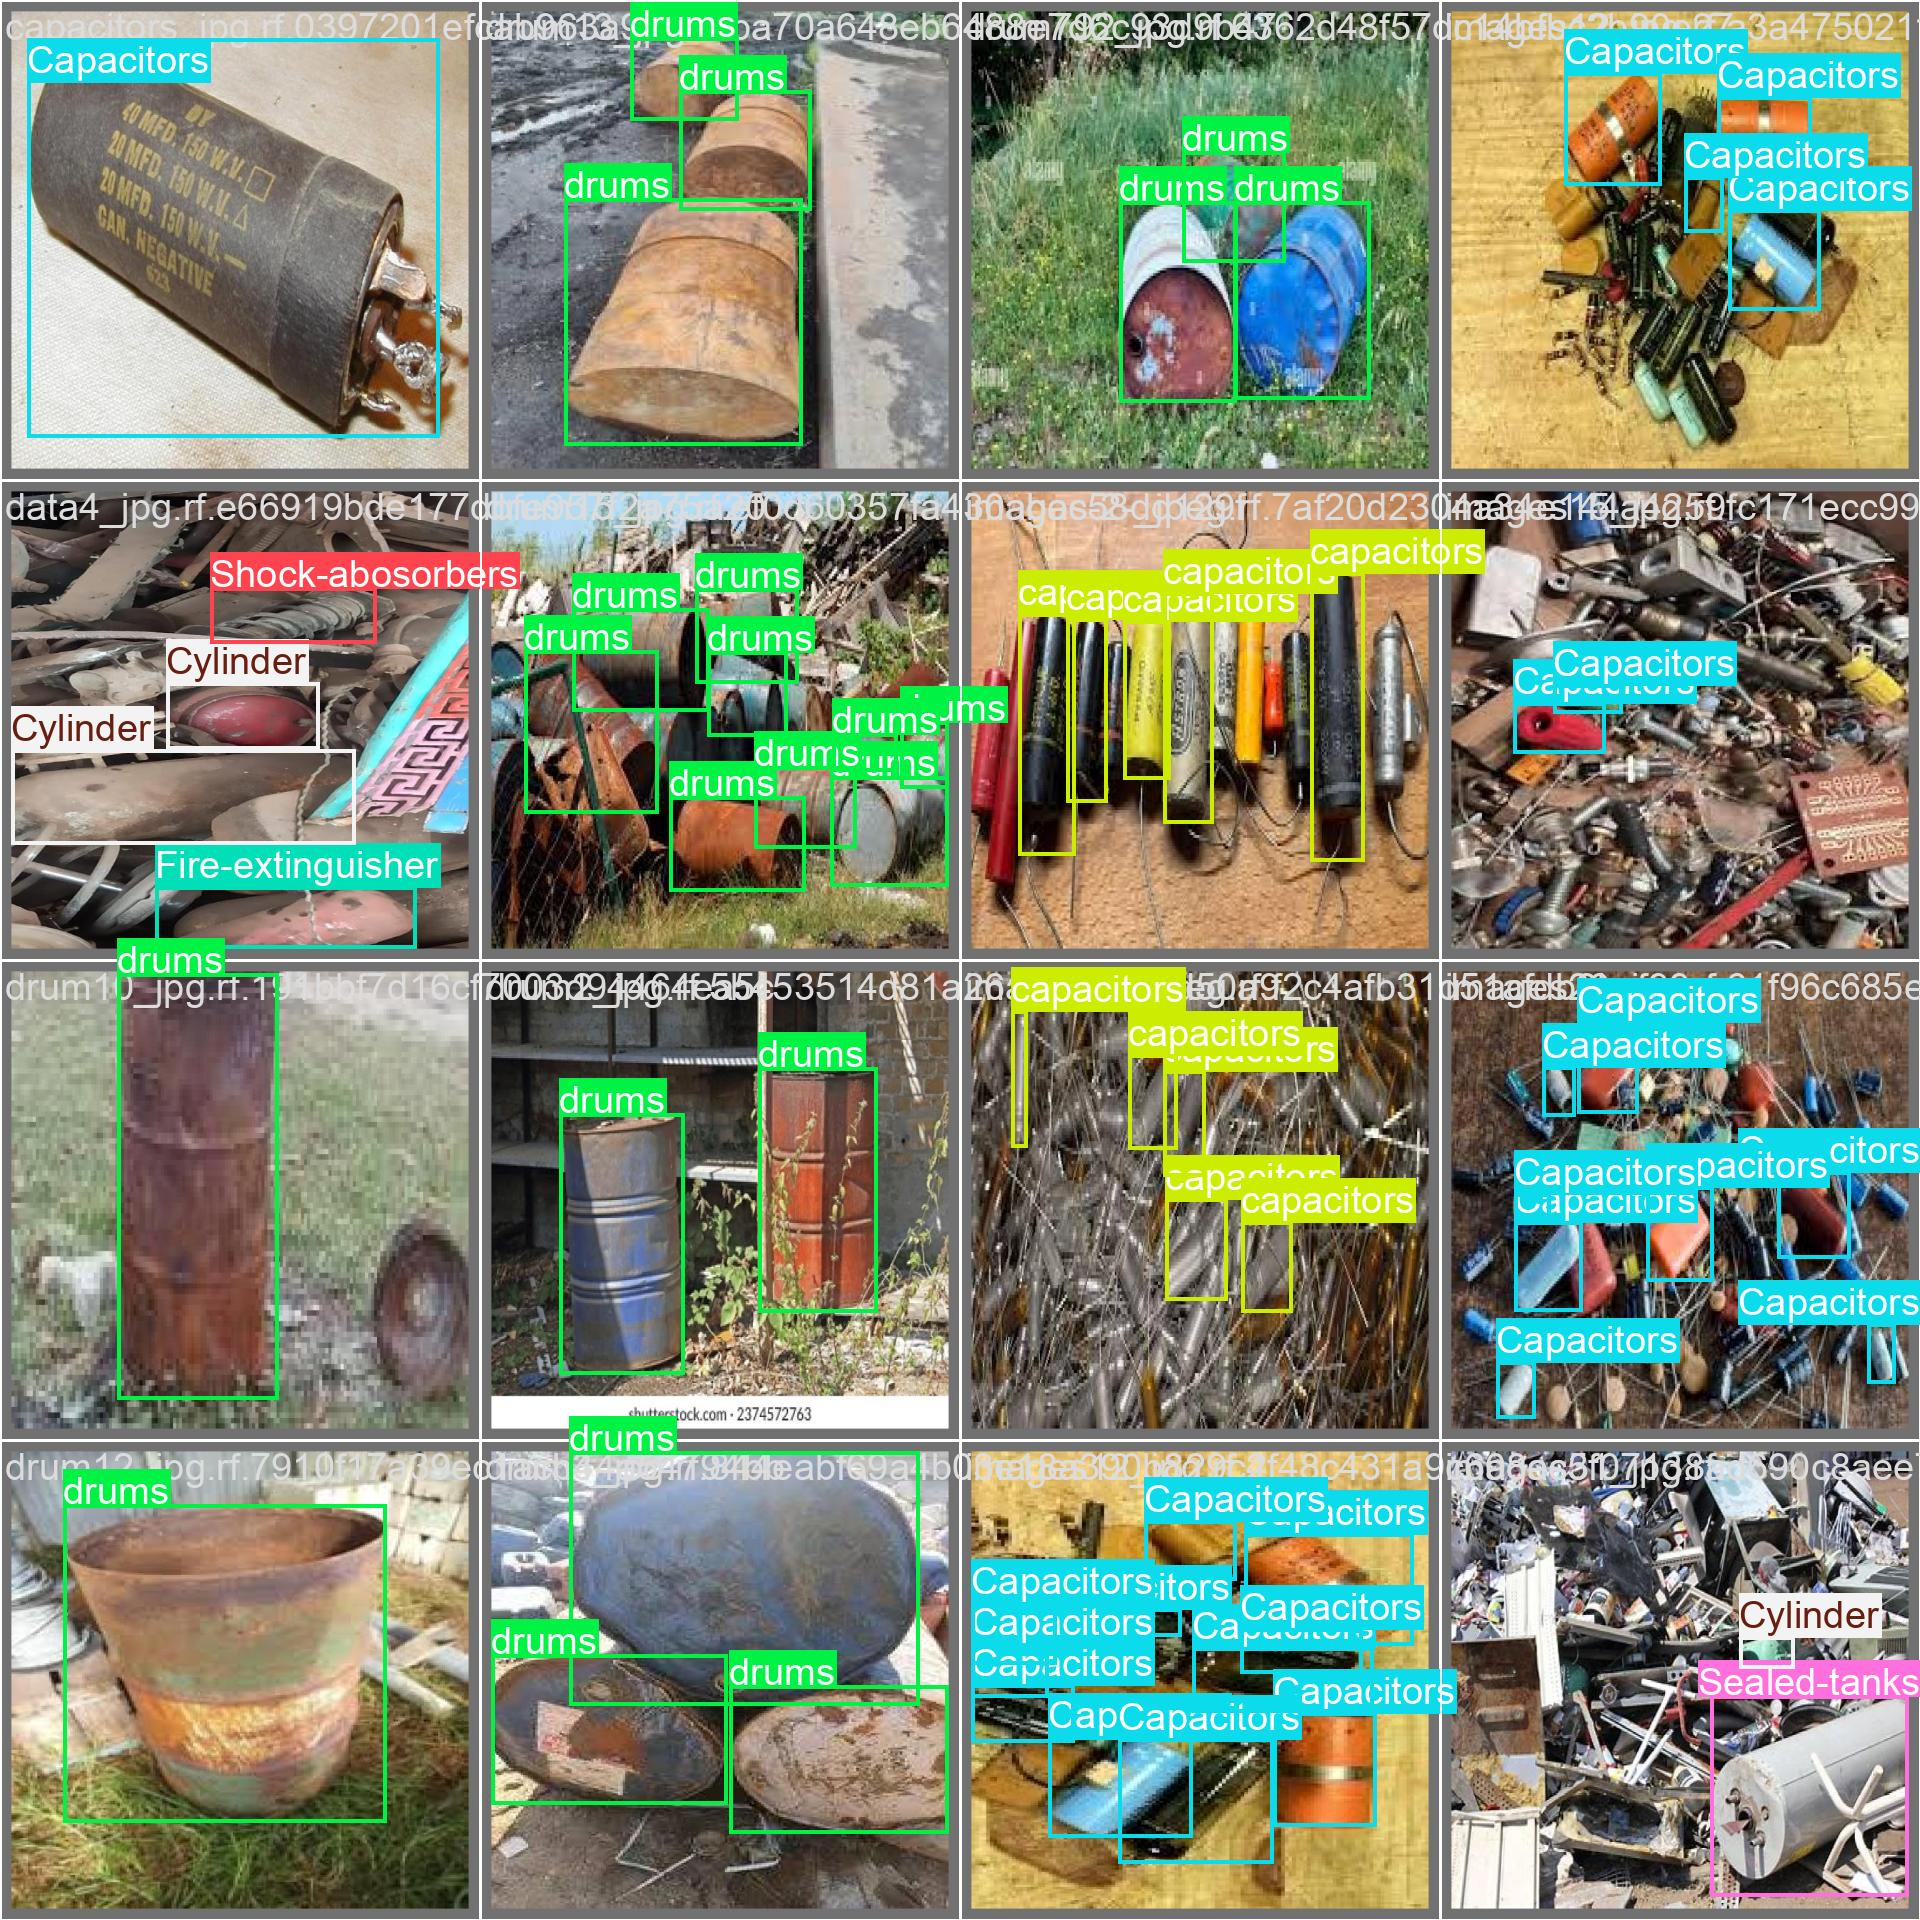

In [12]:
Image(filename='/content/runs/detect/train2/val_batch1_labels.jpg', width=600)

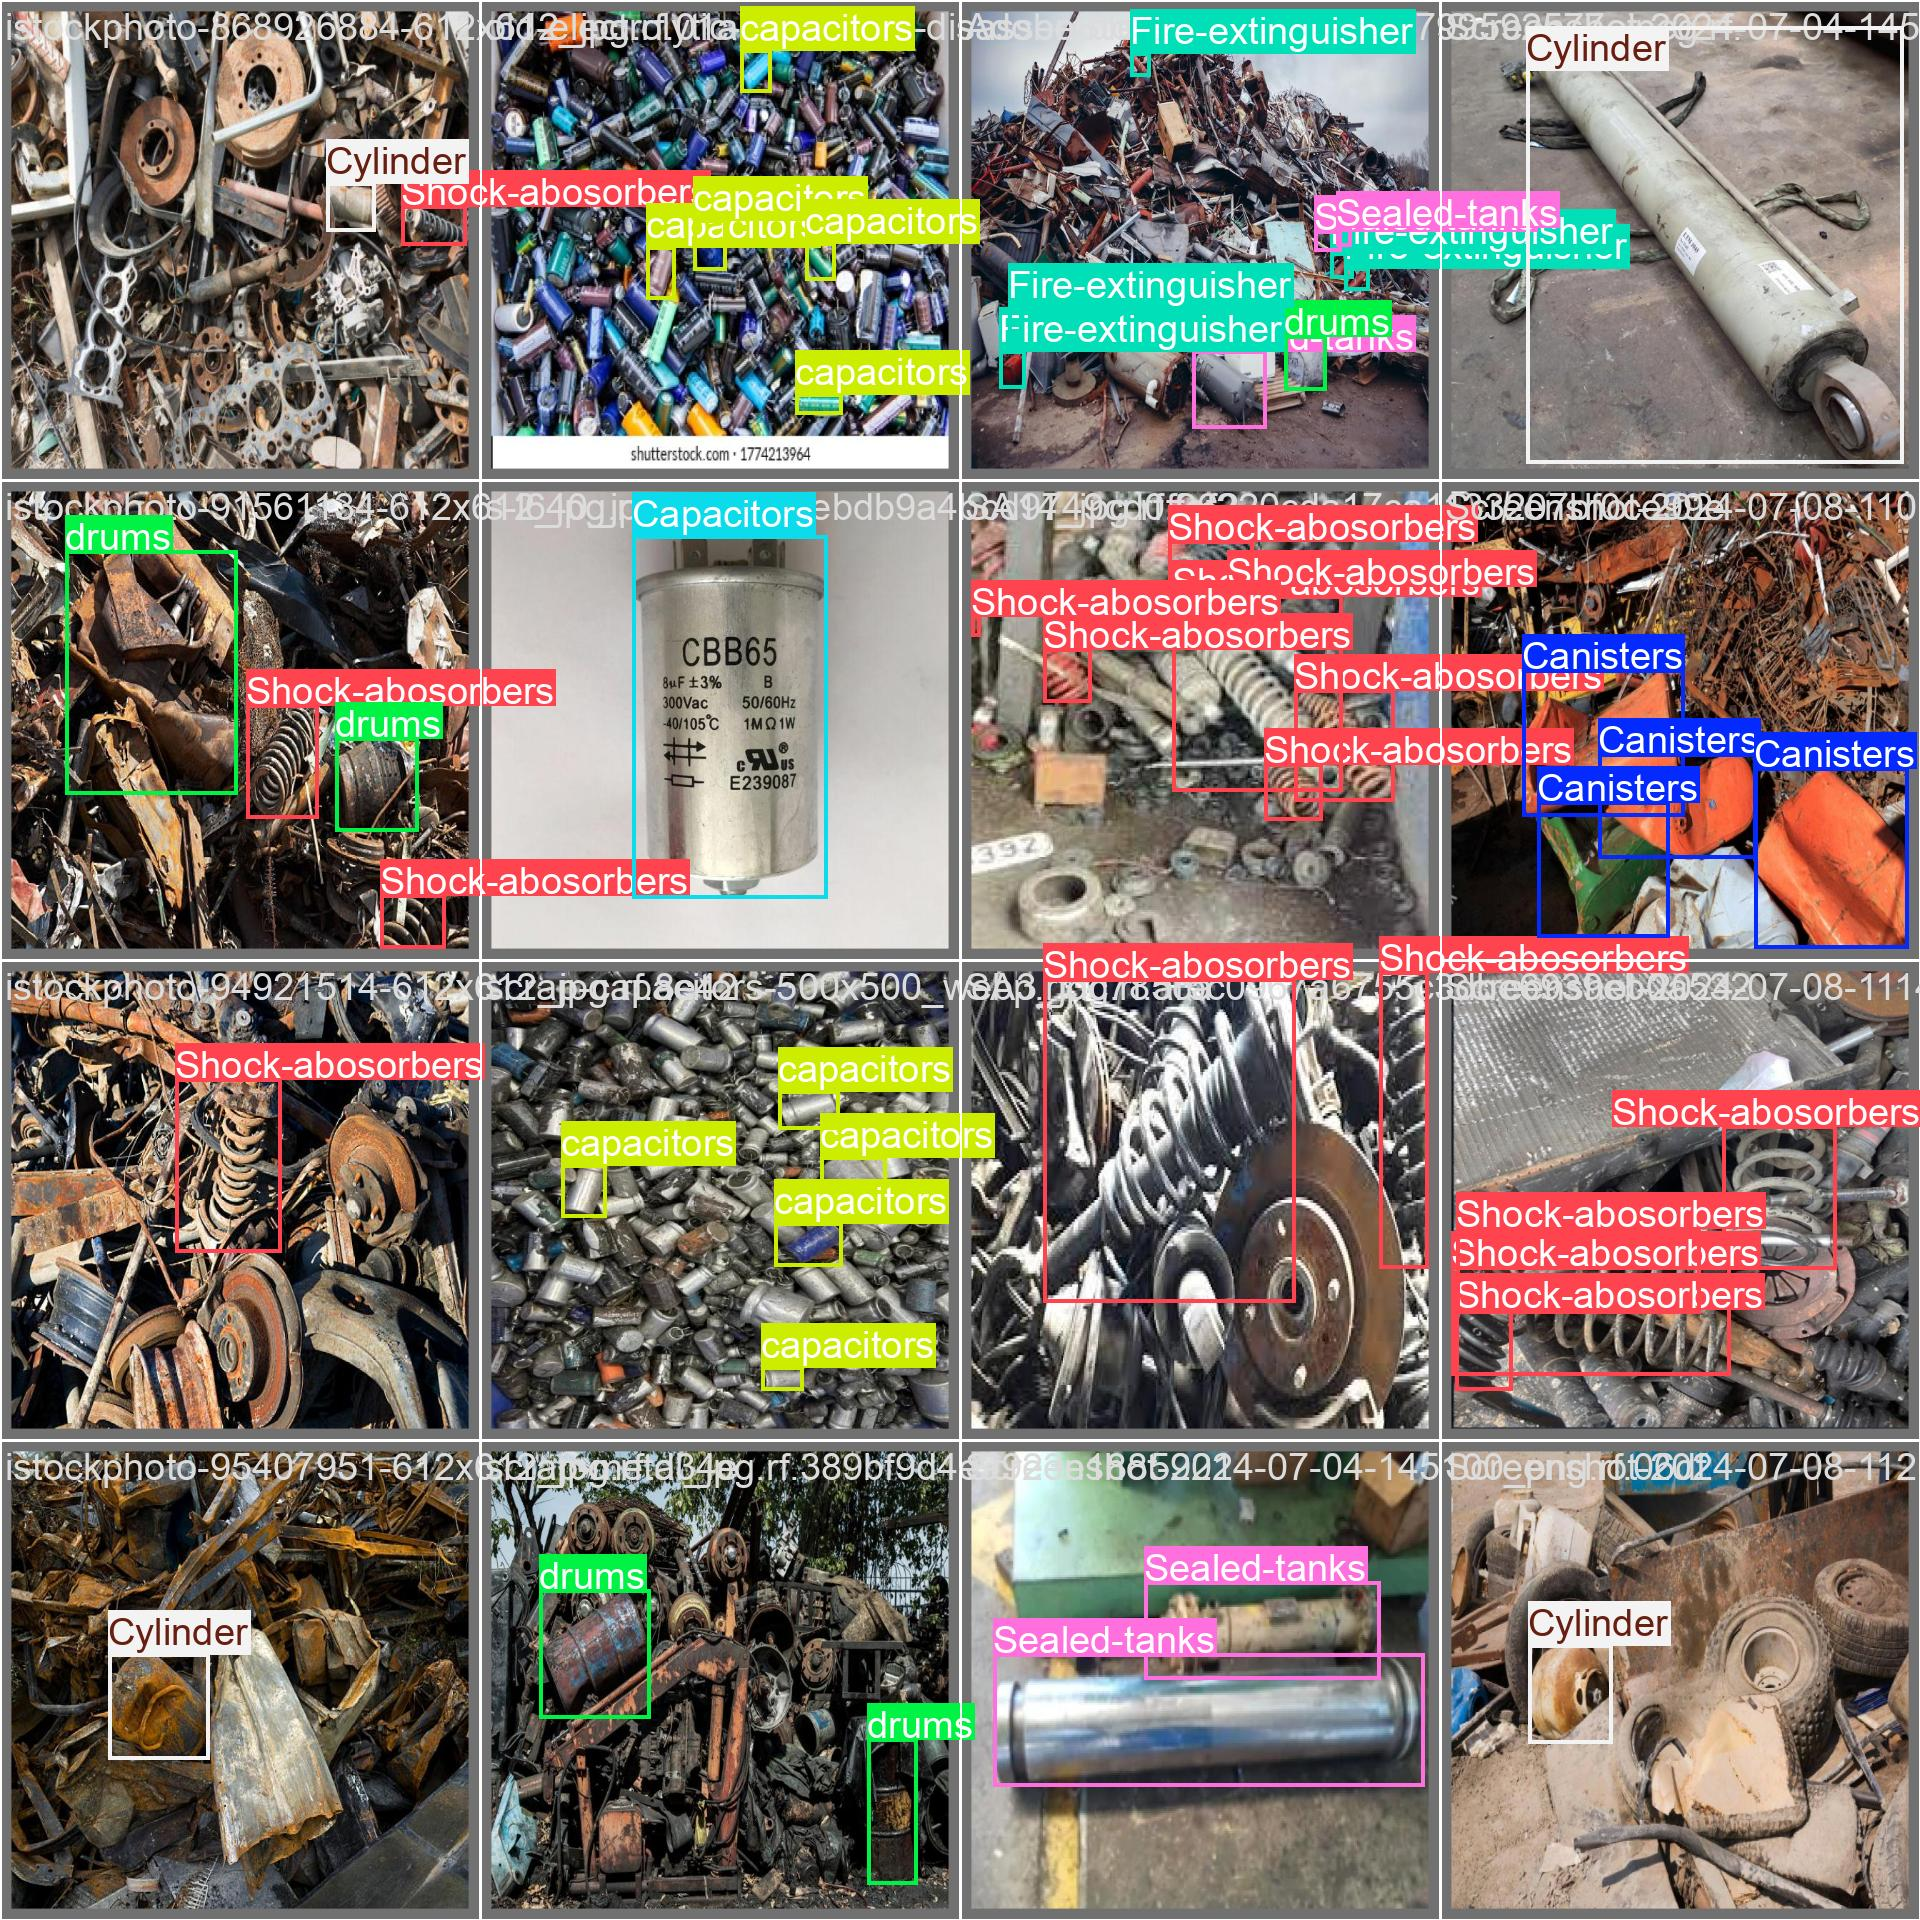

In [15]:
Image(filename='/content/runs/detect/train2/val_batch2_labels.jpg', width=600)

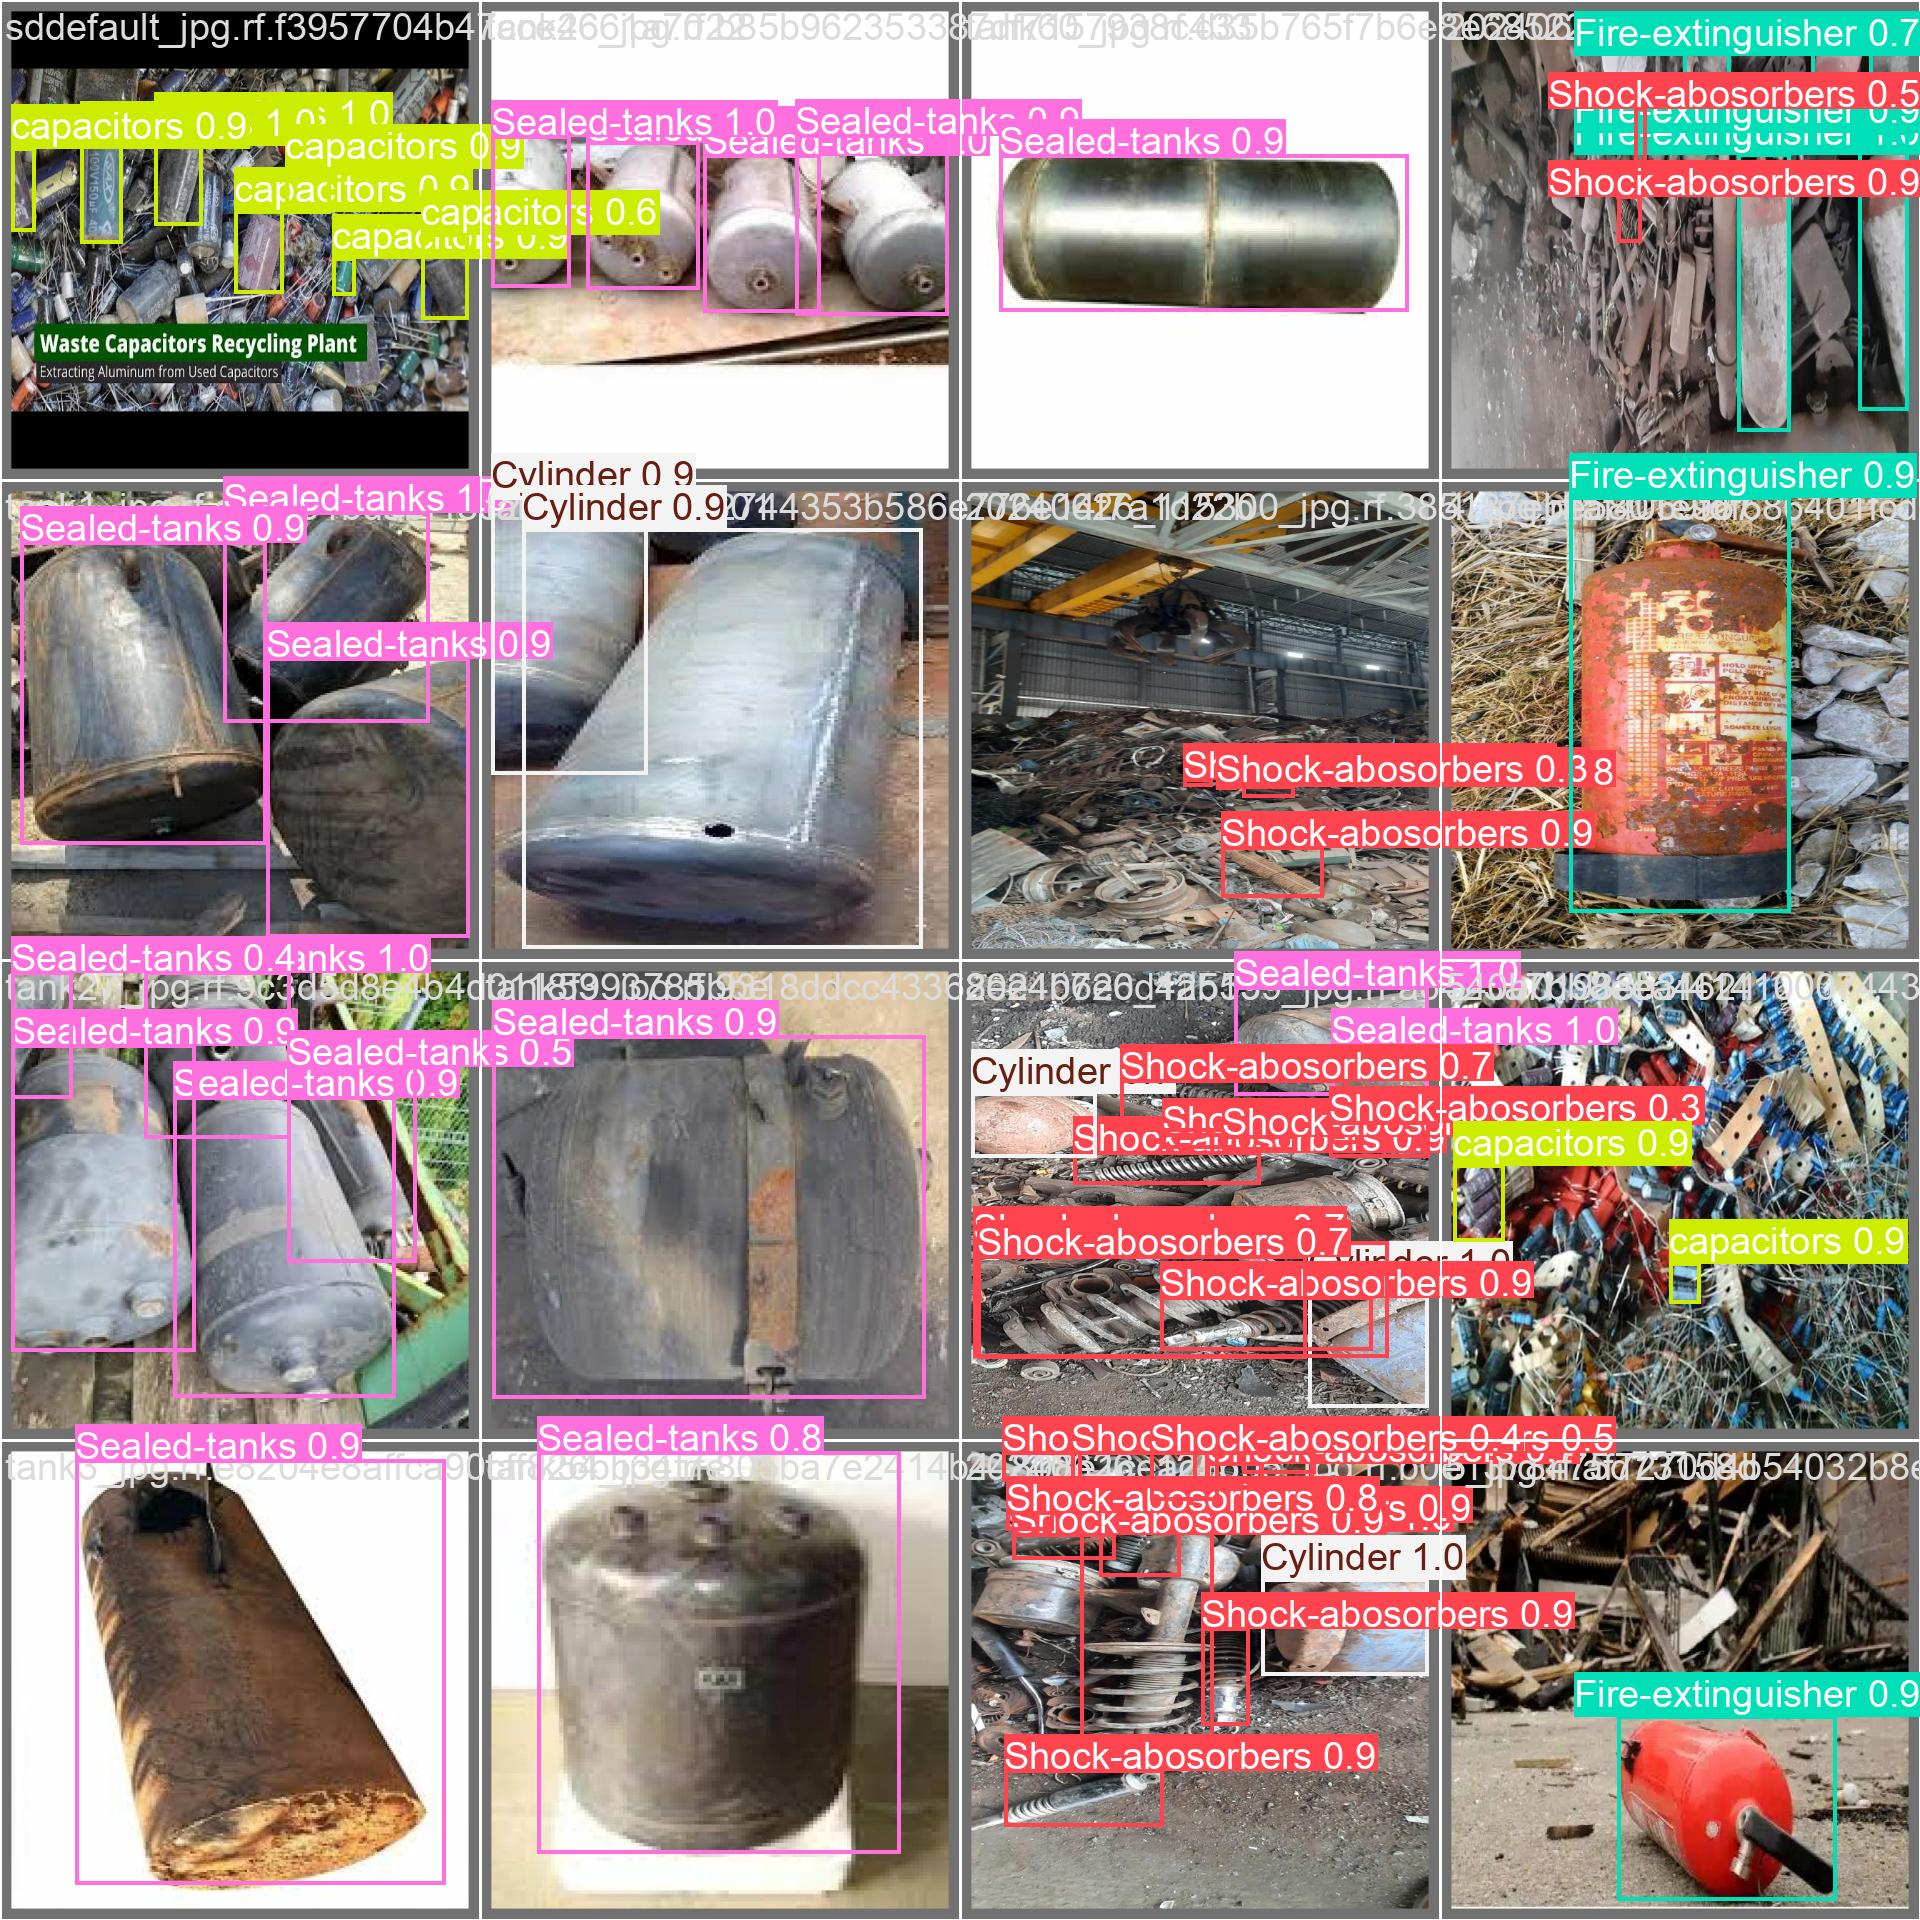

In [20]:
Image(filename='/content/runs/detect/train2/val_batch0_pred.jpg', width=600)

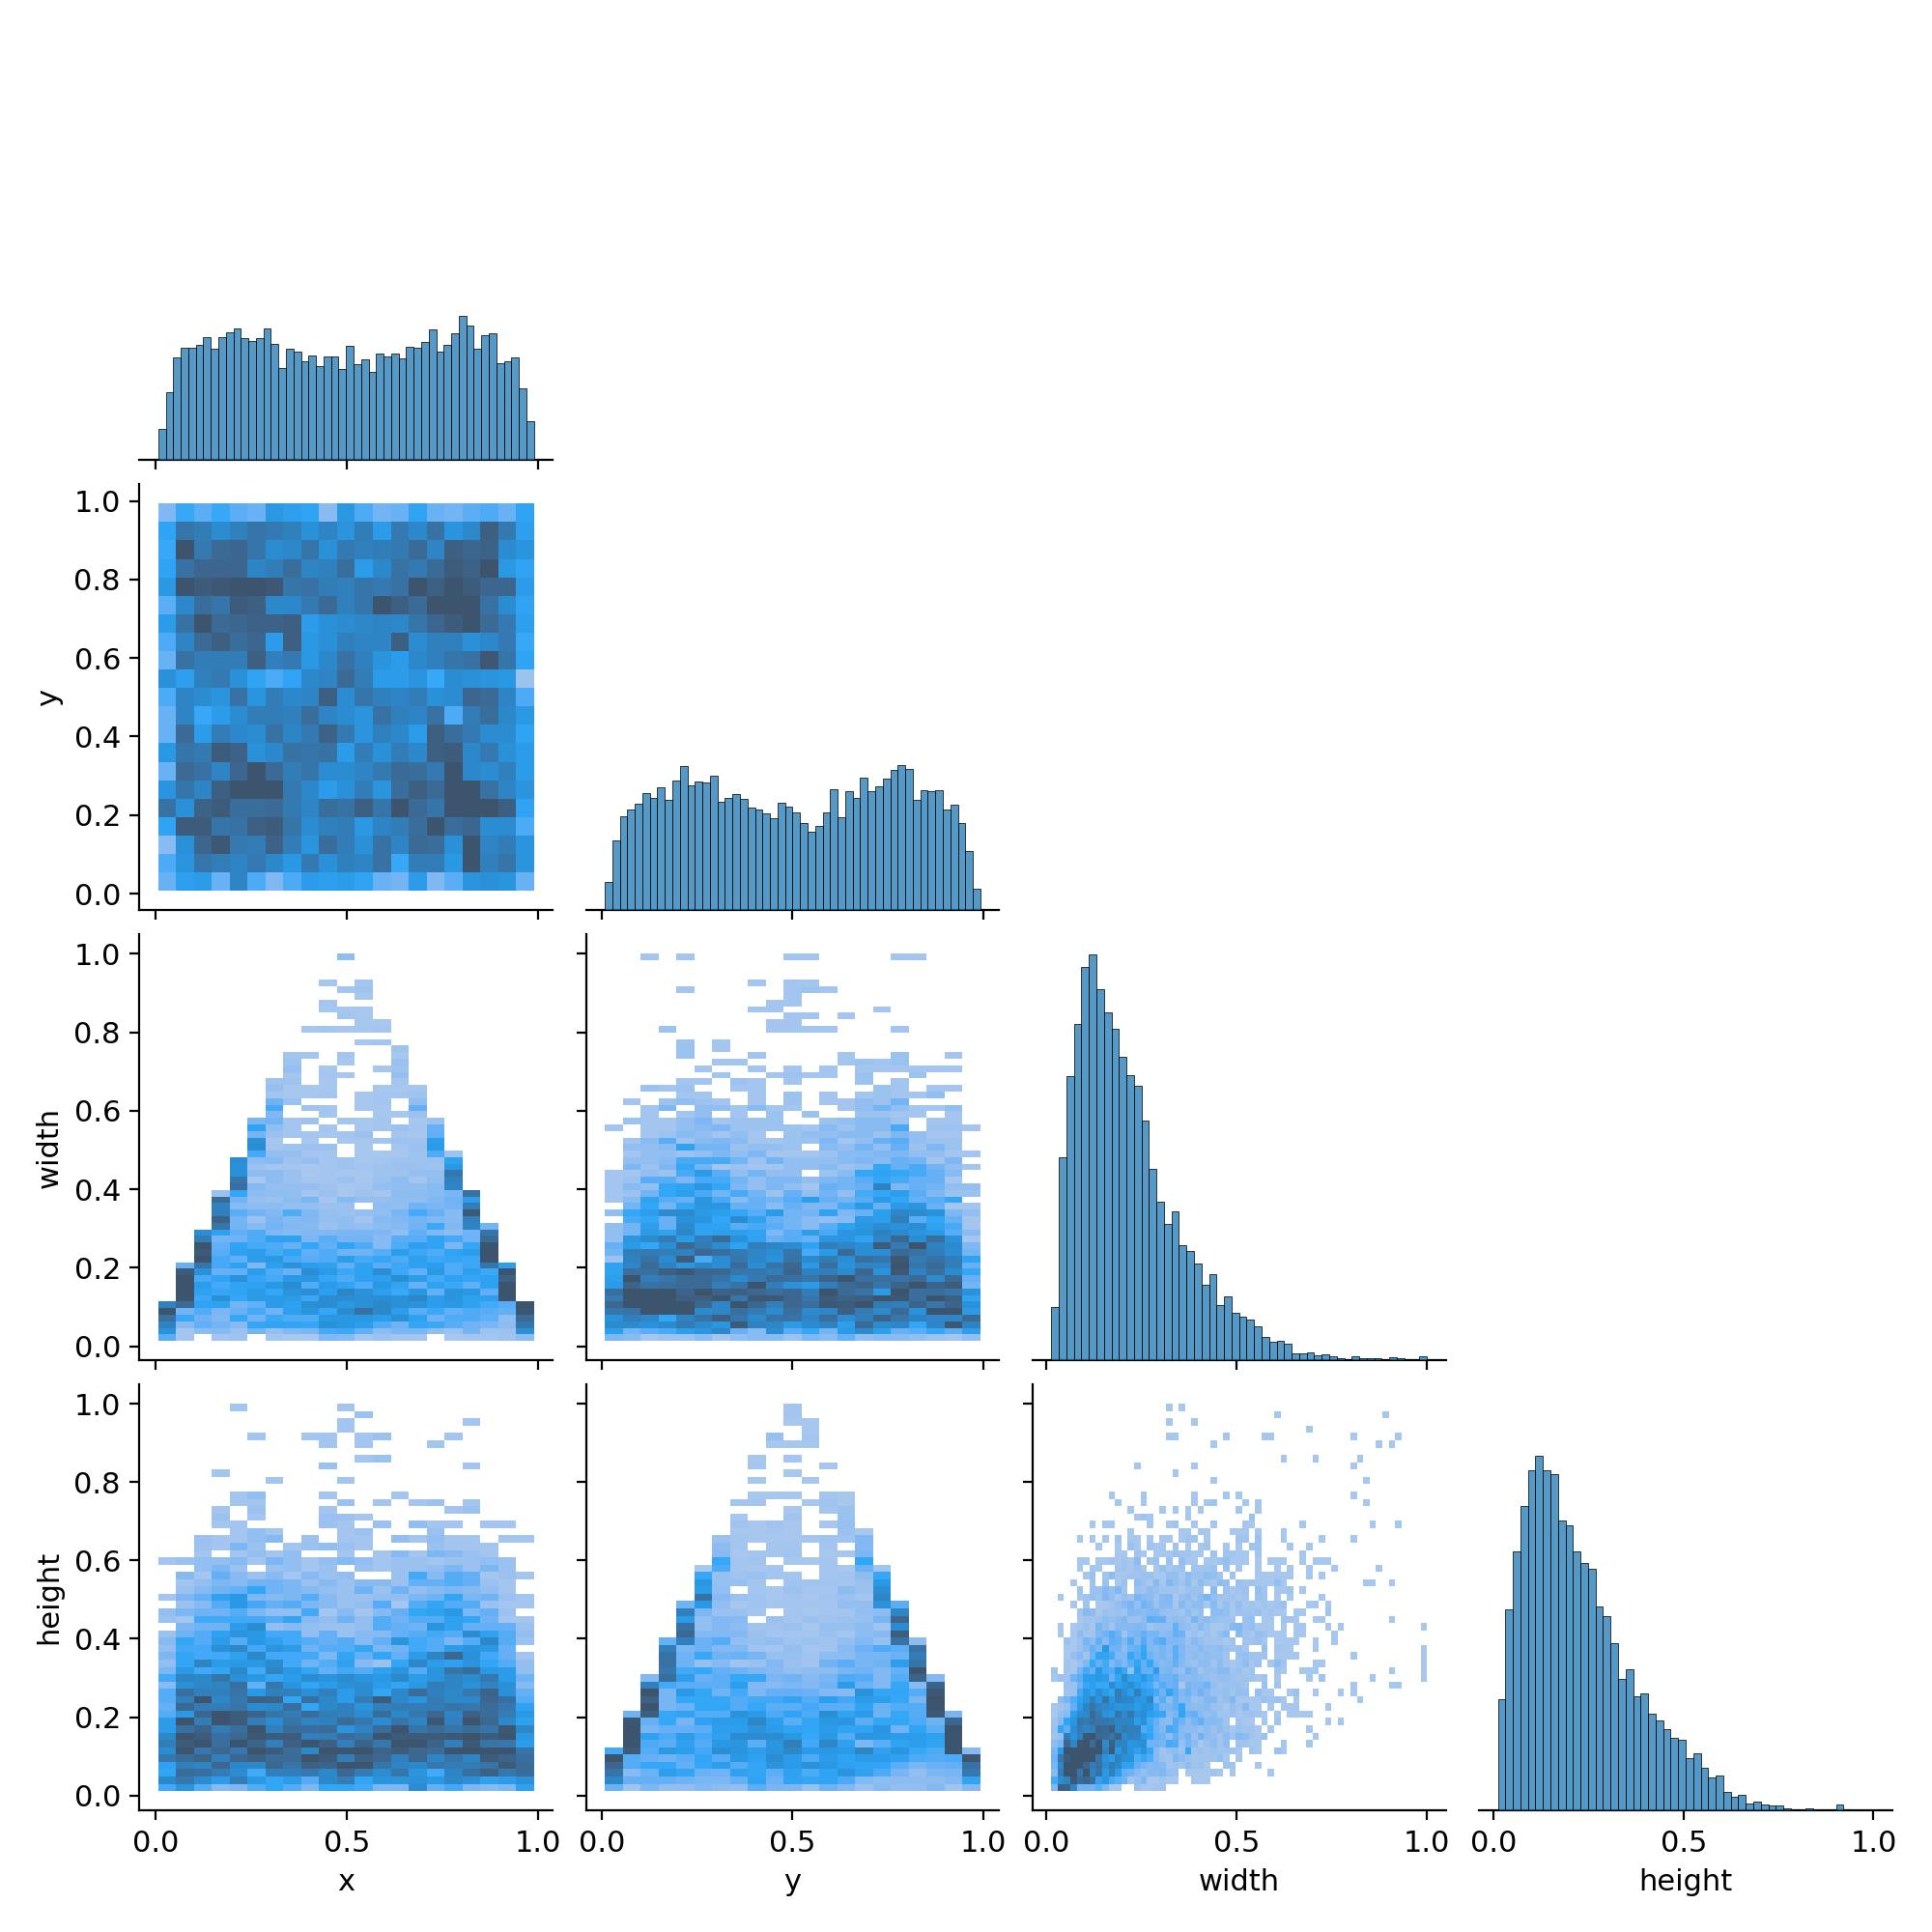

In [18]:
Image(filename='/content/runs/detect/train2/labels_correlogram.jpg', width=600)

#Validation


In [17]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/hazards-5/data.yaml

Ultralytics YOLOv8.2.79 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/hazards-5/valid/labels.cache... 82 images, 3 backgrounds, 0 corrupt: 100% 82/82 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:07<00:00,  1.21s/it]
                   all         82        346      0.915      0.824      0.916      0.774
             Canisters          6         31      0.854      0.839      0.937      0.874
            Capacitors          9         39      0.968      0.783      0.911      0.781
              Cylinder         13         30      0.842      0.889      0.875      0.786
     Fire-extinguisher          7         48      0.857      0.771        0.9      0.736
                Motors          6         24       0.98      0.667      0.865      0.683
          Sealed-tanks         12         25      0.